# 使用cnmaps绘制中国地图实例

## 1.安装
## 查看自己终端环境有无安装conda，如果有的话在终端中输入
## conda install -c conda-forge cnmaps
## 即可完成安装

## 2.使用示例
## 在cnmaps安装完成之后，行政区信息已经在软件中了，我们只需要在使用过程中调用不同参数即可：绘制中国地图、绘制省市行政区边界等信息

## 在使用之前我们首先要将cnmaps导入到当前环境中，

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cnmaps import get_adm_maps, draw_maps

### 接下来我们绘制国家地图

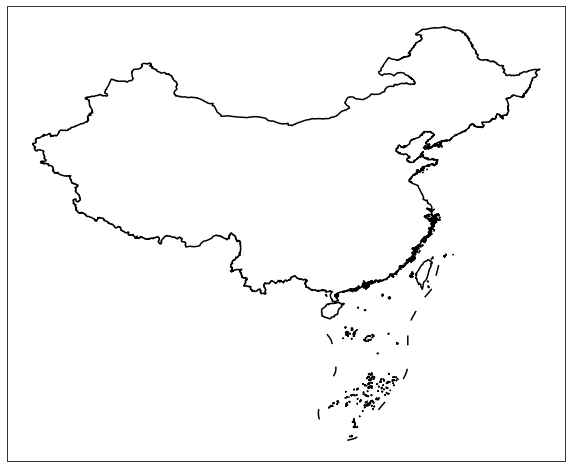

In [2]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

draw_maps(get_adm_maps(level='国'))

plt.show()

### 如果想绘制更精细的省、市地图，我们修改level参数即可，下面是代码

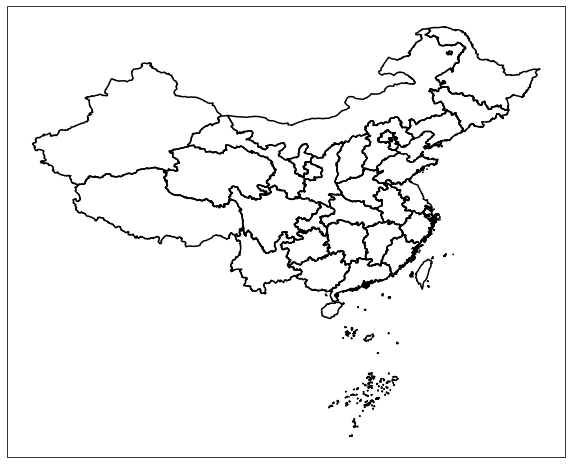

In [3]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

draw_maps(get_adm_maps(level='省'))

plt.show()

## 3.在地图上叠加气象要素场
## 需要的操作在代码中注释了

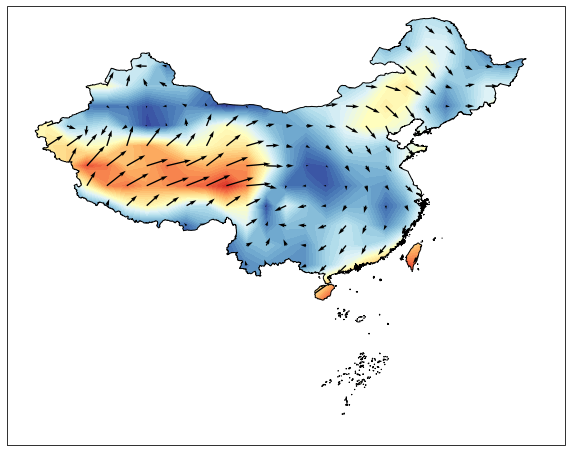

In [4]:
# ---------- 导入所需要的包 ------------
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cnmaps import get_adm_maps, clip_quiver_by_map, clip_contours_by_map, draw_map
from cnmaps.sample import load_wind

lons, lats, u, v = load_wind()  # 这里我们使用内置提供的数据来进行绘制

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
map_polygon = get_adm_maps(country='中华人民共和国', record='first', only_polygon=True)

spd = (u ** 2 + v ** 2) ** 0.5

qv = ax.quiver(lons, lats, u, v,transform=ccrs.PlateCarree(), zorder=2)
cs = ax.contourf(lons, lats, spd, cmap=plt.cm.RdYlBu_r,
                levels=np.linspace(spd.min(), spd.max(), 50),
                transform=ccrs.PlateCarree(), zorder=1)

clip_contours_by_map(cs, map_polygon)  # 这一步的目的是把原有的气象要素场切割，分离出来只在中国大陆上的数据，这样绘制出来的图像就只在中国区域有了
clip_quiver_by_map(qv, map_polygon)

draw_map(map_polygon, color='k', linewidth=1)  #  最后我们在这一步把边界给添加上就可以了

plt.show()